In [1]:
# Cell 1 — Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

import warnings
warnings.filterwarnings("ignore")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Cell 2 — Load MNIST dataset and sample 1000 entries
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Take a random 1000 sample subset
np.random.seed(42)
idx = np.random.choice(len(X), 1000, replace=False)
X_sample, y_sample = X.iloc[idx], y[idx]

print("✅ MNIST sample loaded with shape:", X_sample.shape)


✅ MNIST sample loaded with shape: (1000, 784)


In [3]:
# Cell 3 — Binary classification: digit '0' vs 'non-zero'
y_binary = (y_sample == 0).astype(int)
print("✅ Binary labels created (1 = digit 0, 0 = others)")


✅ Binary labels created (1 = digit 0, 0 = others)


In [4]:
# Cell 4 — Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data split and scaled.")


✅ Data split and scaled.


In [5]:
# Cell 5 — Train a Decision Tree
dtree = DecisionTreeClassifier(max_depth=10, random_state=42)
dtree.fit(X_train_scaled, y_train)

y_pred_dt = dtree.predict(X_test_scaled)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"✅ Decision Tree Accuracy: {acc_dt:.4f}")


✅ Decision Tree Accuracy: 0.9700


In [6]:
# Cell 6 — Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Accuracy: {acc_rf:.4f}")


✅ Random Forest Accuracy: 0.9867


In [7]:
# Cell 7 — Evaluation metrics
print("=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix (DT):")
print(confusion_matrix(y_test, y_pred_dt))

print("\n=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (RF):")
print(confusion_matrix(y_test, y_pred_rf))


=== Decision Tree Report ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       272
           1       0.83      0.86      0.84        28

    accuracy                           0.97       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.97      0.97      0.97       300

Confusion Matrix (DT):
[[267   5]
 [  4  24]]

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       1.00      0.86      0.92        28

    accuracy                           0.99       300
   macro avg       0.99      0.93      0.96       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix (RF):
[[272   0]
 [  4  24]]


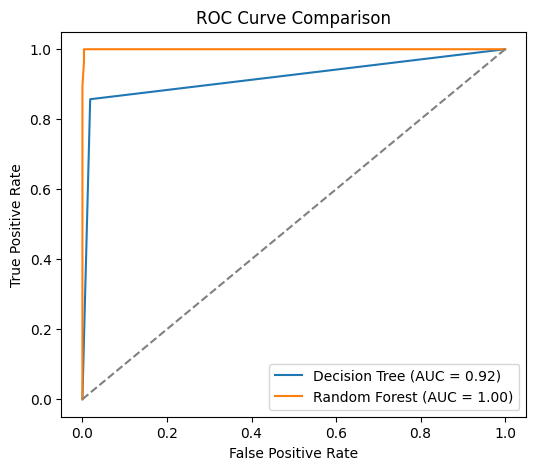

In [8]:
# Cell 8 — ROC Curve for both models
y_score_dt = dtree.predict_proba(X_test_scaled)[:, 1]
y_score_rf = rf.predict_proba(X_test_scaled)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


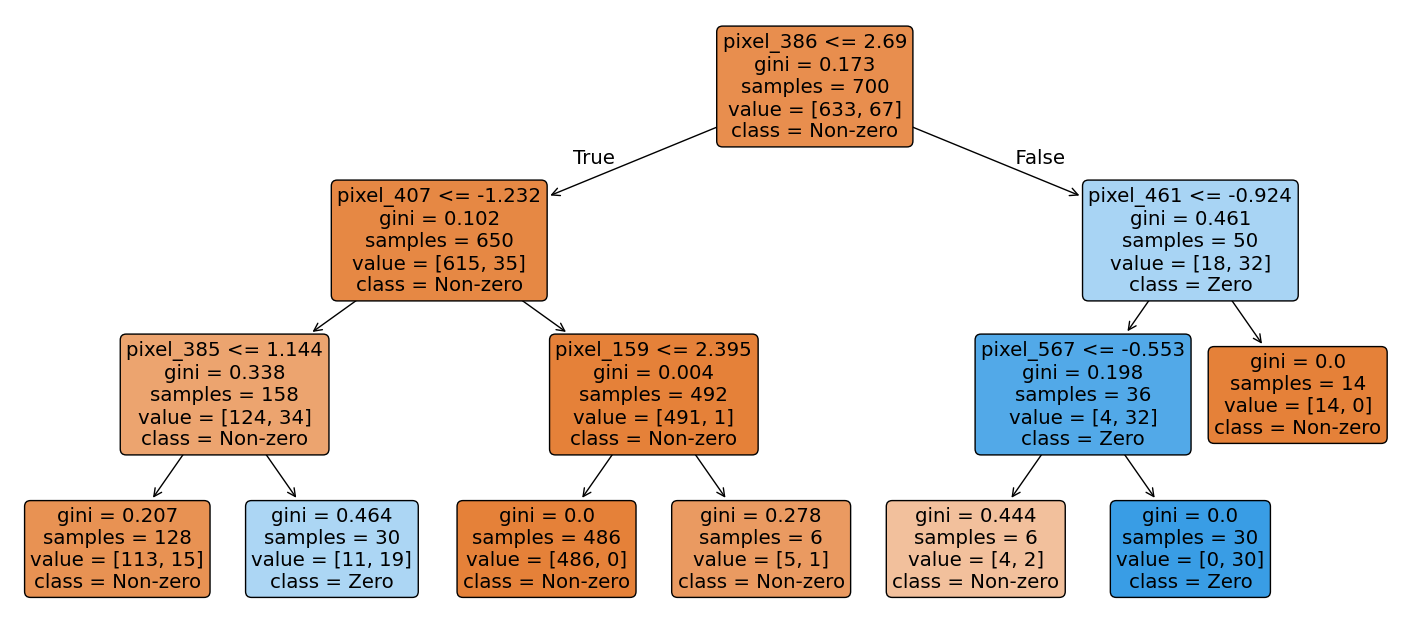

In [9]:
# Cell 9 — Visualize a smaller Decision Tree
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
small_tree.fit(X_train_scaled, y_train)

plt.figure(figsize=(18,8))
plot_tree(
    small_tree,
    filled=True,
    feature_names=[f"pixel_{i}" for i in range(784)],
    class_names=["Non-zero", "Zero"],
    rounded=True
)
plt.show()


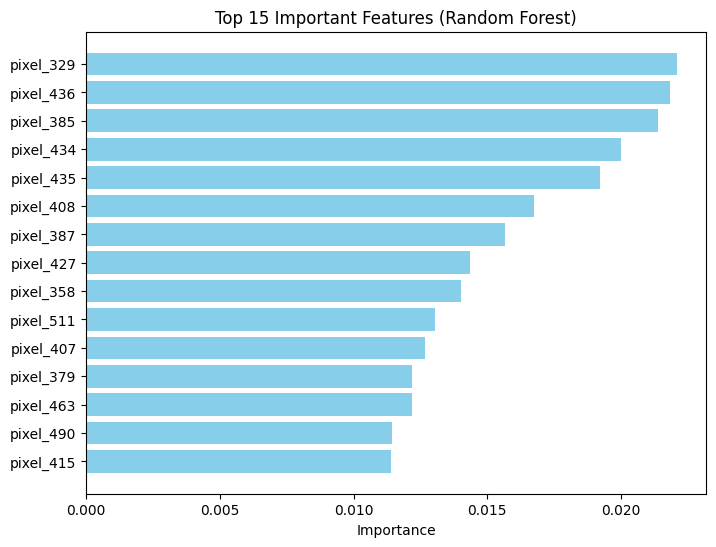

In [10]:
# Cell 10 — Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [f"pixel_{i}" for i in indices])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.show()


In [11]:
# Cell 11 — Save summary report
with open("tree_forest_results.txt", "w") as f:
    f.write(f"Decision Tree Accuracy: {acc_dt:.4f}\n")
    f.write(f"Random Forest Accuracy: {acc_rf:.4f}\n")
    f.write("\nDecision Tree Report:\n")
    f.write(classification_report(y_test, y_pred_dt))
    f.write("\nRandom Forest Report:\n")
    f.write(classification_report(y_test, y_pred_rf))
print("✅ Results saved to tree_forest_results.txt")


✅ Results saved to tree_forest_results.txt


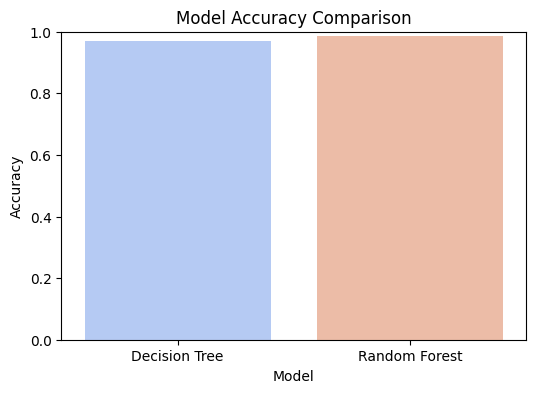

           Model  Accuracy       AUC
0  Decision Tree  0.970000  0.919380
1  Random Forest  0.986667  0.999737


In [12]:
# Cell 12 — Visual comparison of accuracies
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [acc_dt, acc_rf],
    "AUC": [auc_dt, auc_rf]
})

plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

print(results_df)


Total Misclassified Samples: 4


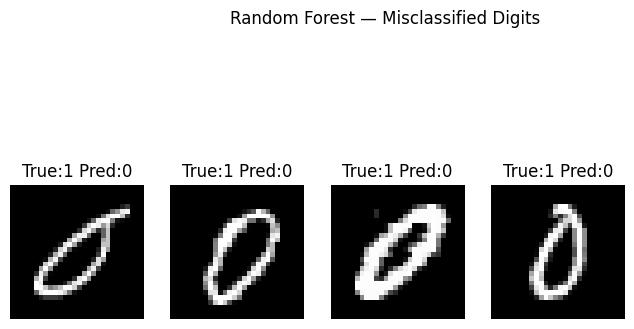

In [13]:
# Cell 13 — Display misclassified test samples
mis_idx = np.where(y_pred_rf != y_test)[0]

print(f"Total Misclassified Samples: {len(mis_idx)}")

# Show first 5 misclassified images
plt.figure(figsize=(10,5))
for i, idx in enumerate(mis_idx[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test.iloc[idx].values.reshape(28,28), cmap='gray')
    plt.title(f"True:{y_test.iloc[idx]} Pred:{y_pred_rf[idx]}")
    plt.axis('off')
plt.suptitle("Random Forest — Misclassified Digits")
plt.show()


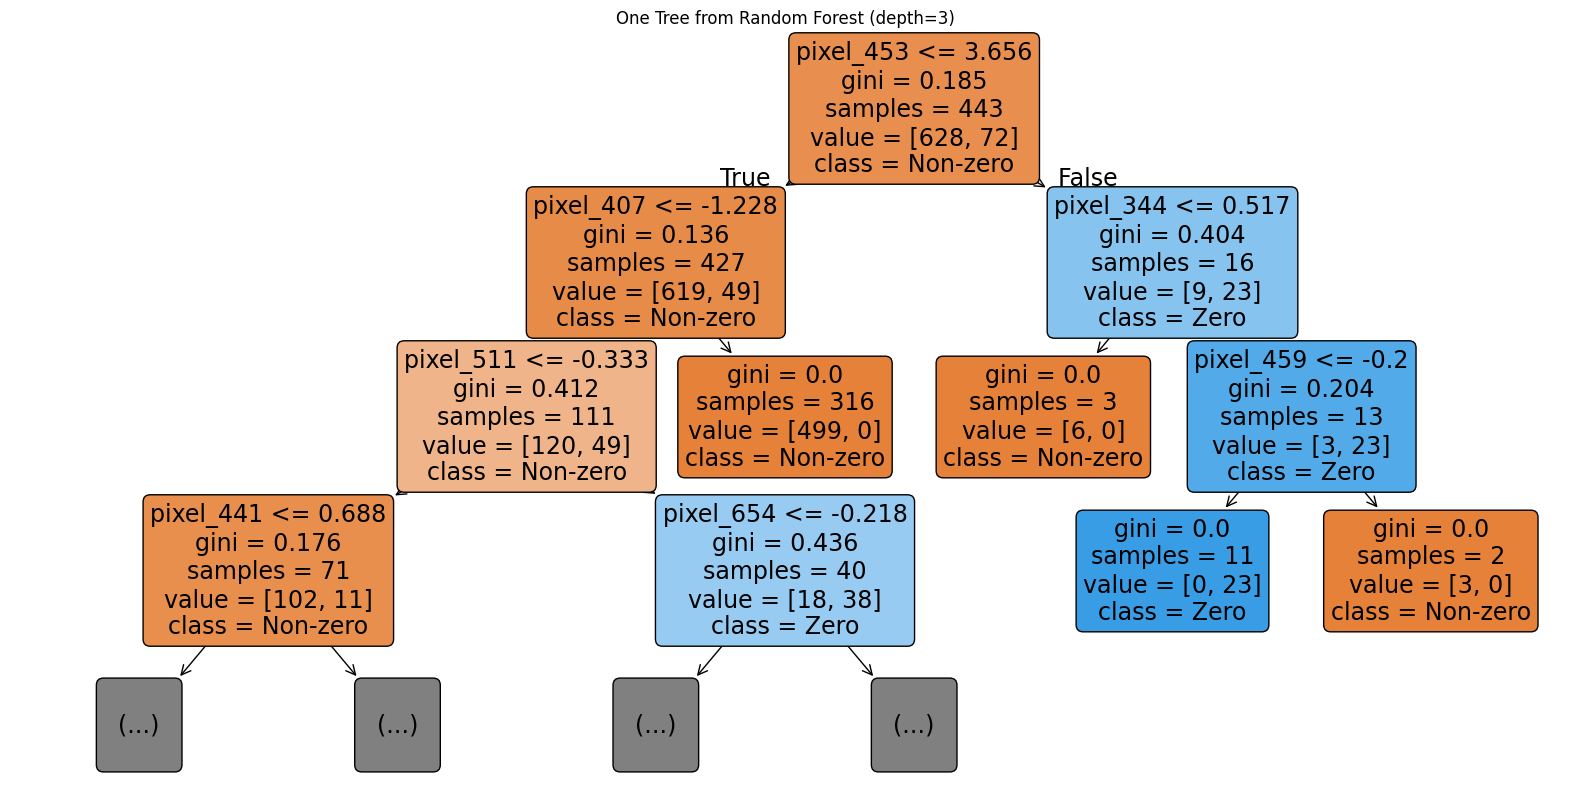

In [14]:
# Cell 14 — Visualize one tree from the Random Forest
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    rf.estimators_[0],
    max_depth=3,
    filled=True,
    class_names=["Non-zero", "Zero"],
    feature_names=[f"pixel_{i}" for i in range(784)],
    rounded=True
)
plt.title("One Tree from Random Forest (depth=3)")
plt.show()


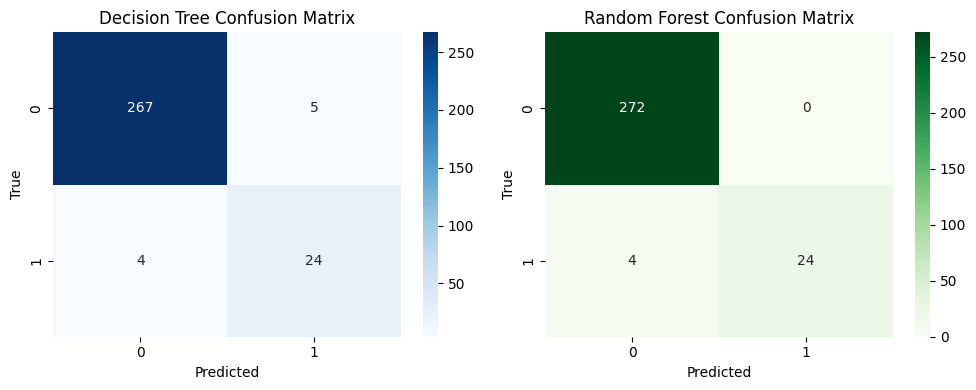

In [15]:
# Cell 15 — Confusion matrix heatmaps
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


In [18]:
# Cell 16 — Print summary of findings
print("🔍 Project Summary:")
print("--------------------")
print(f"Decision Tree Accuracy: {acc_dt:.4f} | AUC: {auc_dt:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f} | AUC: {auc_rf:.4f}")
print("\n✅ Random Forest performs better overall due to ensemble averaging.")
print("✅ Decision Tree is easier to interpret but may overfit small datasets.")
print("✅ ROC & confusion matrices confirm Random Forest’s superior performance.")
print("✅ Feature importance shows which pixels matter most for identifying zeros.")


🔍 Project Summary:
--------------------
Decision Tree Accuracy: 0.9700 | AUC: 0.9194
Random Forest Accuracy: 0.9867 | AUC: 0.9997

✅ Random Forest performs better overall due to ensemble averaging.
✅ Decision Tree is easier to interpret but may overfit small datasets.
✅ ROC & confusion matrices confirm Random Forest’s superior performance.
✅ Feature importance shows which pixels matter most for identifying zeros.
